In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Посмотрим информацию о датасете

In [3]:
df = pd.read_csv('PoliceKillingsUS.csv', encoding= 'unicode_escape')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [103]:
df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


## Проверим на наличие нулей

In [43]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

 ### Есть пробелы в колонках возраста, этнической группы 

## Предположим, что большенство умерших - мужчины средних лет

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0EB85A50>]],
      dtype=object)

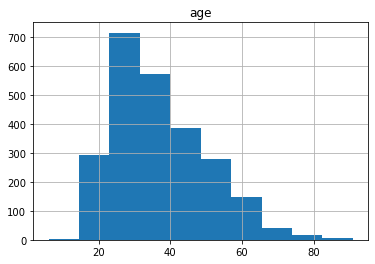

In [41]:
df.hist('age')

### Да, больше всего погибло людей в возрасте от 20 до 30 лет

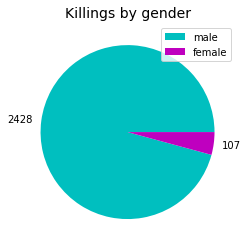

In [4]:
df = pd.DataFrame(df)
m = df.loc[df['gender'] == 'M']
f = df.loc[df['gender'] == 'F']
labels = [m.gender.count(), f.gender.count()]
sizes = [m.gender.count(), f.gender.count()]
plt.pie(sizes, labels = labels, colors = ['c', 'm'])
plt.title ('Killings by gender', fontsize=14)
plt.legend(['male', 'female'])

### Мужчин убивают гораздо больше, чем женщин 

## В связи с нынешними беспорядками в США, можно предпложить, что афроамериканских ребят убивают больше

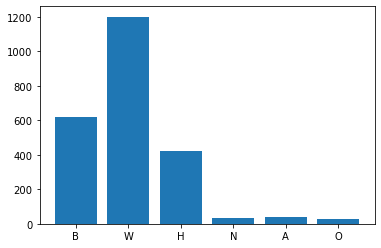

In [16]:
B = df[(df['race'] == 'B')].count()[0]
W = df[(df['race'] == 'W')].count()[0]
H = df[(df['race'] == 'H')].count()[0]
N = df[(df['race'] == 'N')].count()[0]
A = df[(df['race'] == 'A')].count()[0]
O = df[(df['race'] == 'O')].count()[0]
RaceCount = [B,W, H, N, A, O]
RaceType = ['B', 'W', 'H', 'N', 'A', 'O']

plt.bar(RaceType, RaceCount)
plt.show()

### На графике видно, что белых убивают больше, однако, стоит обратиться к данным о соотношении населения Америки в 2015 году

Text(0.5, 1.0, 'Poplation by race ')

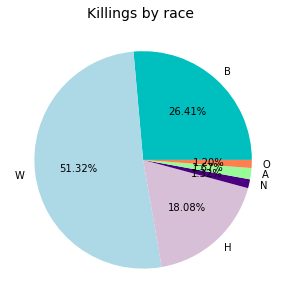

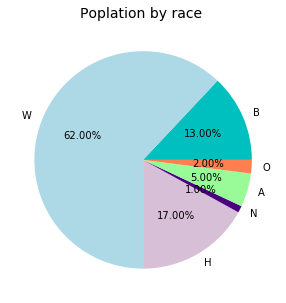

In [9]:
df = pd.DataFrame(df)
Br = df.loc[df['race'] == 'B']
Wr = df.loc[df['race'] == 'W']
Hr = df.loc[df['race'] == 'H']
Nr = df.loc[df['race'] == 'N']
Ar = df.loc[df['race'] == 'A']
Or = df.loc[df['race'] == 'O']


labels = ['B', 'W', 'H', 'N', 'A','O']
sizes = [Br.race.count(), Wr.race.count(), Hr.race.count(), Nr.race.count(), Ar.race.count(), Or.race.count()]
colors = ['c', 'lightblue', 'thistle', 'indigo', 'palegreen', 'coral']


plt.figure(figsize=(5,5))
plt.pie(sizes, labels = labels, autopct='%.2f%%', colors=colors)
plt.title ('Killings by race ', fontsize=14)
#plt.legend(['B', 'W', 'H', 'N', 'A', 'O'])


sizes2 = [13,62,17,1,5,2 ]
labels2 = ['B', 'W', 'H', 'N', 'A', 'O']


plt.figure(figsize=(5,5))
plt.pie(sizes2,labels = labels2,  autopct='%.2f%%', colors=colors)
plt.title ('Poplation by race ', fontsize=14)



### Сравнивая две диаграммы, можно прийти к выводу о том, что афроамериканцев действительно убивают больше. Кроме того латиноамериканцы, тоже умирают от полицейских больше других групп 

## Теперь можно посмотреть, соотношение психически стабильных и нестабильных 

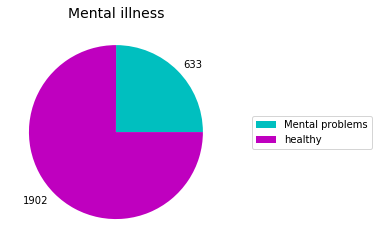

In [12]:
df = pd.DataFrame(df)
t = df.loc[df['signs_of_mental_illness'] == True]
f = df.loc[df['signs_of_mental_illness'] == False]
labels = [t.signs_of_mental_illness.count(), f.signs_of_mental_illness.count()]
sizes = [t.signs_of_mental_illness.count(), f.signs_of_mental_illness.count()]
plt.pie(sizes, labels = labels, colors = ['c', 'm'])
plt.title ('Mental illness', fontsize=14)
plt.legend(['Mental problems', 'healthy'],loc="right", bbox_to_anchor=(1, 0, 0.7, 1) )

### Среди всех убитых четверть человек оказалось психически нездоровой 

## Теперь можно проверить, отличается ли у них выбор оружия

In [77]:
df['armed']

0              gun
1              gun
2          unarmed
3       toy weapon
4         nail gun
           ...    
2530           gun
2531       vehicle
2532           gun
2533       vehicle
2534         knife
Name: armed, Length: 2535, dtype: object

### В датасете оказалось очень много видов оружия, поэтому статистику можно провести по самым популярным 

([<matplotlib.patches.Wedge at 0xb92cb30>,
 [Text(0.242685987480436, 1.0728949209874403, 'gun'),
  Text(-1.0553142854978834, 0.3103413585458631, 'unarmed'),
  Text(-0.37674348195586776, -1.033471987430607, 'Knife'),
  Text(1.0300087029599856, -0.3861114759064902, 'toy weapon'),
  Text(1.0970993276902157, -0.07983147989156153, 'nail gun')],
 [Text(0.1323741749893287, 0.5852154114476947, '42.92%'),
  Text(-0.5756259739079364, 0.16927710466137985, '5.06%'),
  Text(-0.20549644470320058, -0.5637119931439675, '42.92%'),
  Text(0.5618229288872648, -0.21060625958535825, '6.79%'),
  Text(0.5984178151037539, -0.043544443577215375, '2.31%')])

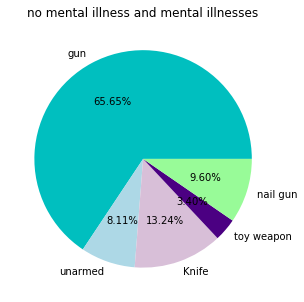

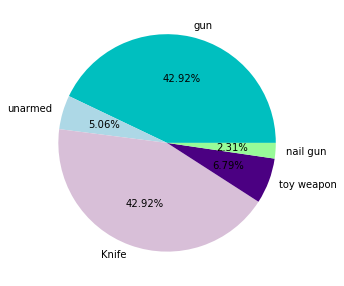

In [10]:
G_OK = df[(df['armed'] == 'gun')&(df['signs_of_mental_illness'] == False) ]
G_NotOK = df[(df['armed'] == 'gun')&(df['signs_of_mental_illness'] == True) ]
K_OK = df[(df['armed'] == 'knife')&(df['signs_of_mental_illness'] == False) ]
K_NotOK = df[(df['armed'] == 'gun')&(df['signs_of_mental_illness'] == True) ]
N_OK = df[(df['armed'] == 'unarmed')&(df['signs_of_mental_illness'] == False) ]
N_NotOK = df[(df['armed'] == 'unarmed')&(df['signs_of_mental_illness'] == True) ]
Toy_OK = df[(df['armed'] == 'toy weapon')&(df['signs_of_mental_illness'] == False) ]
Toy_NotOK = df[(df['armed'] == 'toy weapon')&(df['signs_of_mental_illness'] == True) ]
Nail_OK =  df[(df['armed'] == 'vehicle')&(df['signs_of_mental_illness'] == False) ]
Nail_NotOK = df[(df['armed'] == 'vehicle')&(df['signs_of_mental_illness'] == True) ]

sizes = [G_OK.armed.count(), N_OK.armed.count(), K_OK.armed.count(), Toy_OK.armed.count(), Nail_OK.armed.count()]
labels = ['gun', 'unarmed','Knife', 'toy weapon', 'nail gun']
colors = ['c', 'lightblue', 'thistle', 'indigo', 'palegreen']

sizes1 = [G_NotOK.armed.count(), N_NotOK.armed.count(), K_NotOK.armed.count(), Toy_NotOK.armed.count(), Nail_NotOK.armed.count()]


plt.figure(figsize=(5,5))
plt.pie(sizes , labels = labels,  autopct='%.2f%%', colors = colors)

plt.title ('no mental illness and mental illnesses')
plt.figure(figsize=(5,5))
plt.pie(sizes1 , labels = labels,  autopct='%.2f%%', colors = colors)
#plt.show()

### Да, предположение подтвердилось. У них отличается выбор оружия, большинство психически здоровых выбирают ружья, а выбор психически нездоровых разделяется между ружьём и ножом

## И в заключении, предположим, что большинство умирает от выстрела без издевательств 

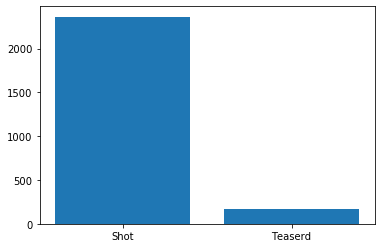

In [11]:
Shot = df[(df['manner_of_death'] == 'shot')].count()[0]
Teasered = df[(df['manner_of_death'] == 'shot and Tasered')].count()[0]
MannerCount = [Shot, Teasered]
MannerType = ['Shot', 'Teaserd']

plt.bar(MannerType, MannerCount)
plt.show()

### Да, гипотеза подтвердилась. Однако, число людей, над которыми издевались полицейские не на нуле 